## k-NN (k - Nearest Neighbors)

In statistics, the k-nearest neighbors algorithm (k-NN) is a non-parametric supervised learning method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression.

<div style="display: flex; justify-content: center;">
<img src="./images/knn.png" alt="plot of a plane" style="width:800px;"/></div>


### k-NN Algorithm

<div style="display: flex; justify-content: center;">
<img src="./images/knn2.png" alt="plot of a plane" style="width:700px;"/></div>

- Find the distances $d_i$ from all points around.
- Sort the distances from the smallest to the largest.
- Pick first $k$ distances from sorted list $(d_1, d_2, \dots, d_k)$.
- Sum up all assigned values from first $k$ points and compute mean value.
- Asign mean value to unknown category point.

In [53]:
import numpy as np

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

def nearest_value(array, value):
    index = (np.abs(array - value)).argmin()
    return array[index]

class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, x, y):
        self.x_train = np.array(x)
        self.y_train = np.array(y)

    def _predict(self, x):
        # Find the distances of given point x from all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.x_train]

        # Sort the indices of distances by asscend order and pick first k elements
        k_indices = np.argsort(distances)[:self.k]
        
        # Find the assigned value of the k elements
        k_assigned_values = [self.y_train[i] for i in k_indices]
        print(k_assigned_values)
        # Find the mean value and return prediction
        common_value = np.bincount(k_assigned_values).argmax()
        
        # Find the nearest value from assigned values possibilities
        unique_values = unique(self.y_train)
        value = nearest_value(unique_values, common_value)

        return value
        


In [58]:
def create_training_data(size):
    x = []
    y = []

    for i in range(size):
        for j in range(size):
            if (i > 10 and j > 20):
                x.append((i,j))
                y.append(1)
            elif (i > 30 and j < 6):
                x.append((i,j))
                y.append(2)
            else:
                x.append((i,j))
                y.append(3)
    
    return x, y

In [65]:
import matplotlib.pyplot as plt

# Create training data
x, y = create_training_data(30)


In [70]:
# Create and train model
my_model = KNN(8)
my_model.fit(x, y)

# Predict value for a given point
prediction = my_model._predict((20,20))

[3, 3, 3, 1, 3, 3, 1, 3]


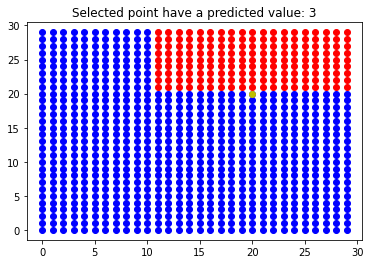

In [71]:
# Plot training data
for i in range(len(x)):
    color = ""
    if (y[i] == 1):
        color = "r"
    elif (y[i] == 2):
        color = "g"
    else:
        color = "b"
    plt.scatter(x[i][0], x[i][1], c=color)

# Plot prediction
plt.scatter(20, 20, c="y")
plt.title(f"Selected point have a predicted value: {prediction}")
plt.show()